medical insurence predictor 


In [3]:
#importing the necessary lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#importiing the data set 
df = pd.read_csv('insurance.csv')

eda 


In [7]:
# shape 
print('Shape',df.shape)

Shape (1338, 7)


In [8]:
#info
print(df.info)

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [16]:
print(df.describe())
#basic stats

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [17]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [18]:
#checking for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#Basic visualization


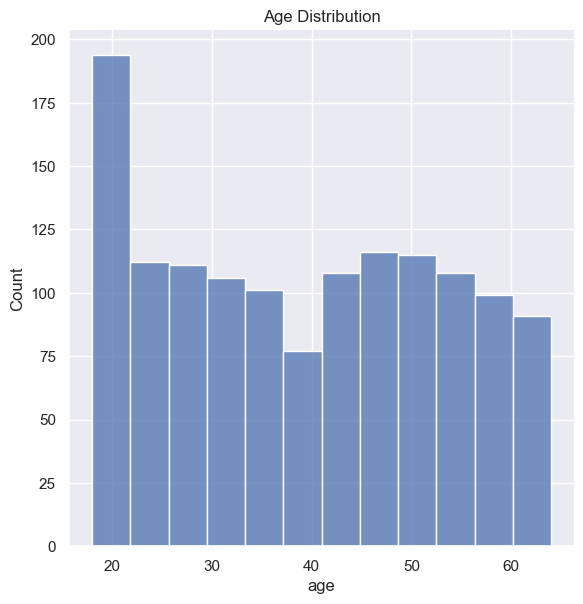

In [20]:
sns.set()
sns.displot(data=df, x='age', height=6, aspect=1)
plt.title("Age Distribution")
plt.show()


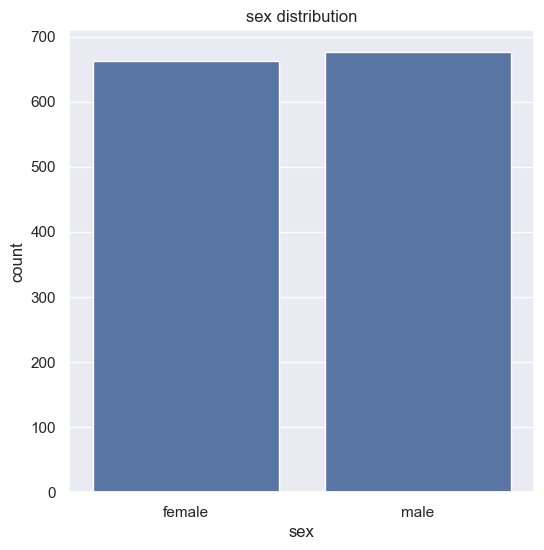

In [25]:
#sex distrbution
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data= df)
plt.title('sex distribution')
plt.show()



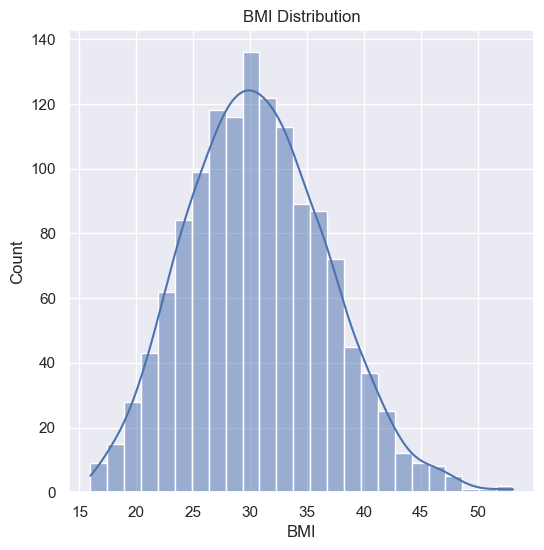

In [30]:
#BMI distribution
plt.figure(figsize=(6,6))
# use seaborn.histplot (distplot is deprecated and may not accept `data` in some versions)
sns.histplot(data=df, x='bmi', kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

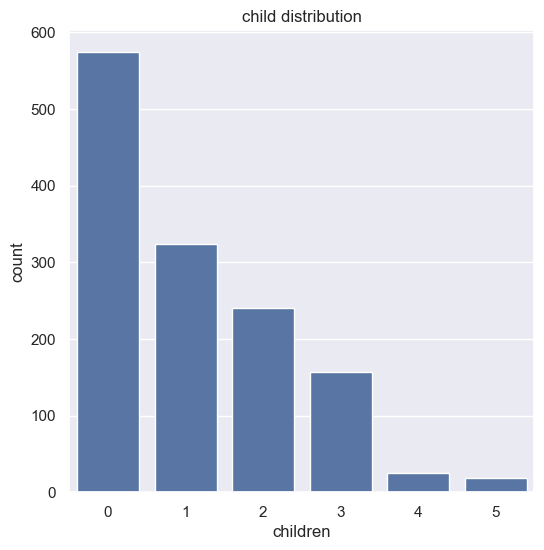

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [34]:
#children count  distrbution
plt.figure(figsize=(6,6))
sns.countplot(x='children', data= df)
plt.title('child distribution')
plt.show()
df['children'].value_counts()


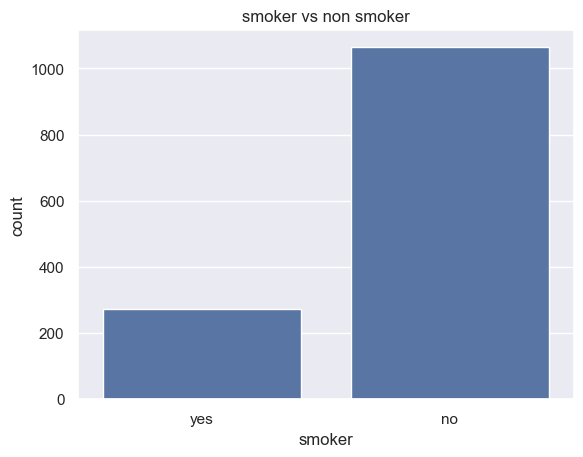

In [36]:
#smoker vs non smoker
sns.countplot(x='smoker', data=df)
plt.title('smoker vs non smoker')
plt.show()

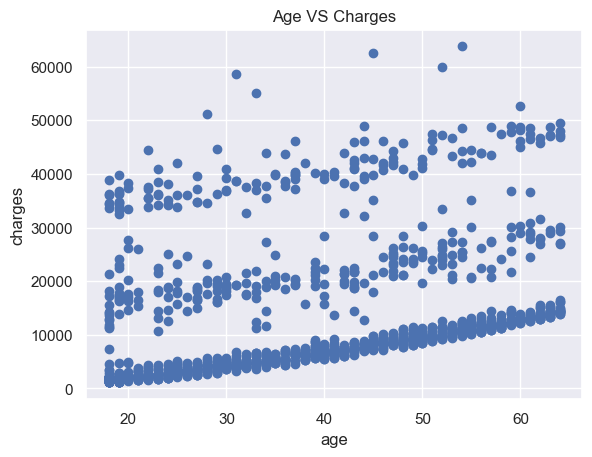

In [35]:
#age vs chrge
plt.scatter(df['age'], df['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age VS Charges')
plt.show()

#PREPROCESSING


In [ ]:
# encoding categorical values
# male = 0, female = 1
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# smoker = 0, non-smoker = 1
df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# region: map to numeric codes 
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [43]:
# encoding using one hot encoding
# use pandas.get_dummies with the correct parameter name `columns`
df_encoded = pd.get_dummies(df, columns=['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


#splitting the data 


In [45]:
# into features and target 
X= df.drop(columns='charges', axis = 1)
Y = df['charges']
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [46]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [47]:
# splitiing into train test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
#model training

In [50]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

moidel evaluation


In [51]:
pred = model.predict(X_train)

In [52]:
#r2 score 
r2_train = metrics.r2_score(Y_train, pred)
print(r2_train)

0.7413131194887537


building a predictiv system 


In [63]:
check = np.array([31, 1, 25, 0, 1, 0])
resha= check.reshape(1,-1)
prediction = model.predict(resha)
print('the amount of the medical insuerance in USD will be:',prediction)

the amount of the medical insuerance in USD will be: [3769.02182034]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
